In [4]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.circuit.library import QFTGate  
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import Sampler as AerSampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
from qiskit.circuit.library.basis_change import QFT
from qiskit.circuit.library import GroverOperator, MCMT, ZGate
import sys
import os

parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)

from modules.ladder import ladder_up


In [5]:
def shift_edge(pos,sign,a):
    qc = QuantumCircuit(pos, sign, a, name = 'Shift')
    
    qc.cx(sign,a)
    qc.ch(a,sign) 

    ladder_control = ladder_up(pos).control(1)


    qc.append(ladder_control, list(sign) + list(pos))

    return qc

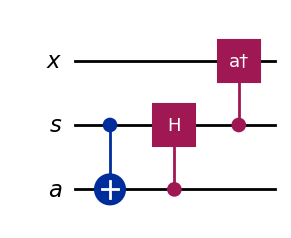

In [6]:
x = QuantumRegister(1, name='x')
s = QuantumRegister(1, name='s')
a = QuantumRegister(1, name='a')

shift = shift_edge(x,s,a)
qc = QuantumCircuit(x,s,a)
qc.append(shift, list(x) + list(s)+list(a))
qc.decompose().draw('mpl')